In [1]:
import pandas as pd
import scipy.stats as spicy
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import necessary dataframes:

days = pd.read_csv('../data/dates_periods.csv', sep=';', decimal=',', index_col=0)
youtube = pd.read_csv('../data/youtube_by_day.csv', sep=';', decimal=',', index_col=0)
exercise = pd.read_csv('../data/exercise_summary_day.csv', sep=';', decimal=',', index_col=0)

In [3]:
# change format of the date

days['date'] = days['date'].apply(lambda x: dt.strptime(x, '%d/%m/%Y')).apply(lambda y: dt.strftime(y,'%Y-%m-%d'))

In [4]:
days['date'][0]


youtube['date'][0]

'2014-08-13'

In [5]:
# merge all 3 in a leftjoin

# 1st step

merged = days.merge(youtube,how = 'left', on='date').merge(exercise,how='left', on='date')
merged.head()

,date,period,Searched,Watched,distance,flightsClimbed,steps,durationDistance,durationFlights,durationSteps
0,2017-10-28,1st Period,4.0,4.0,0.095790,NaN,132.0,0 days 00:24:15.000000000,NaN,0 days 00:24:15.000000000
1,2017-10-29,1st Period,3.0,8.0,3.127187,14.0,4732.0,0 days 05:34:01.000000000,0 days 00:00:00.000000000,0 days 05:34:01.000000000
2,2017-10-30,1st Period,NaN,12.0,5.474378,7.0,7518.0,0 days 06:01:36.000000000,0 days 00:00:00.000000000,0 days 06:01:36.000000000
3,2017-10-31,1st Period,5.0,32.0,2.109710,3.0,3123.0,0 days 05:23:53.000000000,0 days 00:00:00.000000000,0 days 05:23:53.000000000
4,2017-11-01,1st Period,3.0,11.0,4.161810,5.0,6559.0,0 days 05:50:59.000000000,0 days 00:00:00.000000000,0 days 05:50:59.000000000


In [6]:
# now let's find the weekday and weekends equivalent in order to have the appropriate filter

# convert the column date into a datetime series
merged['date'] = merged['date'].apply(lambda x: dt.strptime(x, '%Y-%m-%d'))

In [7]:
# define a function to get the day of the week an classify it in labour or weekend

def labour_weekend(date):
    weekday = date.weekday()
    if weekday in range(5):
        return 'labour'
    else:
        return 'weekend'

In [8]:
# apply the previous function to the date column and save it as a new column

merged['weekday'] = merged['date'].apply(labour_weekend)
merged['distance_per_step'] = merged['distance']/merged['steps'] * 1000
merged

,date,period,Searched,Watched,distance,flightsClimbed,steps,durationDistance,durationFlights,durationSteps,weekday,distance_per_step
0,2017-10-28,1st Period,4.0,4.0,0.095790,NaN,132.0,0 days 00:24:15.000000000,NaN,0 days 00:24:15.000000000,weekend,0.725682
1,2017-10-29,1st Period,3.0,8.0,3.127187,14.0,4732.0,0 days 05:34:01.000000000,0 days 00:00:00.000000000,0 days 05:34:01.000000000,weekend,0.660859
2,2017-10-30,1st Period,NaN,12.0,5.474378,7.0,7518.0,0 days 06:01:36.000000000,0 days 00:00:00.000000000,0 days 06:01:36.000000000,labour,0.728169
3,2017-10-31,1st Period,5.0,32.0,2.109710,3.0,3123.0,0 days 05:23:53.000000000,0 days 00:00:00.000000000,0 days 05:23:53.000000000,labour,0.675540
4,2017-11-01,1st Period,3.0,11.0,4.161810,5.0,6559.0,0 days 05:50:59.000000000,0 days 00:00:00.000000000,0 days 05:50:59.000000000,labour,0.634519
...,...,...,...,...,...,...,...,...,...,...,...,...
994,2020-07-18,3rd Period,1.0,4.0,12.223508,72.0,16453.0,0 days 05:44:05.000000000,0 days 01:06:49.000000000,0 days 05:44:05.000000000,weekend,0.742935
995,2020-07-19,3rd Period,NaN,NaN,11.743420,67.0,15153.0,0 days 03:19:27.000000000,0 days 01:01:56.000000000,0 days 03:21:28.000000000,weekend,0.774990
996,2020-07-20,3rd Period,1.0,4.0,5.441970,7.0,7648.0,0 days 02:06:35.000000000,0 days 00:06:26.000000000,0 days 02:06:35.000000000,labour,0.711555
997,2020-07-21,3rd Period,17.0,24.0,2.692950,5.0,4146.0,0 days 02:20:05.000000000,0 days 00:01:21.000000000,0 days 02:20:05.000000000,labour,0.649530


In [9]:
# let's create the slices to make samples:

first_labour = merged[(merged['period'] == '1st Period') & (merged['weekday'] == 'labour')]
first_weekend = merged[(merged['period'] == '1st Period') & (merged['weekday'] == 'weekend')]
second_labour = merged[(merged['period'] == '2nd Period') & (merged['weekday'] == 'labour')]
second_weekend = merged[(merged['period'] == '2nd Period') & (merged['weekday'] == 'weekend')]
third_labour = merged[(merged['period'] == '3rd Period') & (merged['weekday'] == 'labour')]
third_weekend = merged[(merged['period'] == '3rd Period') & (merged['weekday'] == 'weekend')]

In [10]:
# 1st analysis: check if the mean of videos watched, and distance walked differ from labour days to weekend:

sample_labour = merged[merged['weekday'] == 'labour'][['distance', 'distance_per_step', 'Watched']]
sample_weekend  = merged[merged['weekday']== 'weekend'][['distance','distance_per_step', 'Watched']]

result = spicy.ttest_ind(sample_labour, sample_weekend, equal_var=False,  nan_policy = 'omit')

print(result)

'''both p-values are incredibly small which means that the mean for distance walked and videos watched differ from weekday to weekend'''

Ttest_indResult(statistic=masked_array(data=[-7.905926889011593, 7.5592857256924395,
                   10.439517714796457],
             mask=[False, False, False],
       fill_value=1e+20), pvalue=masked_array(data=[2.92187274e-14, 2.12364574e-13, 1.04491228e-23],
             mask=False,
       fill_value=1e+20))


'both p-values are incredibly small which means that the mean for distance walked and videos watched differ from weekday to weekend'

In [11]:
result = spicy.ttest_ind(sample_labour['distance_per_step'], sample_weekend['distance_per_step'], equal_var=False, nan_policy = 'omit')

print(np.mean(sample_labour['distance_per_step']))
print(np.mean(sample_weekend['distance_per_step']))
print(np.std(sample_labour['distance_per_step'],ddof=1))
print(np.std(sample_weekend['distance_per_step'],ddof=1))

print(len(sample_labour[sample_labour['distance_per_step'].notnull()]))
print(len(sample_weekend[sample_weekend['distance_per_step'].notnull()]))
print(result.pvalue)


0.6619396808157856
0.642574989504966
0.03397642535294992
0.036753029714808705
692
276
2.1236457430949996e-13


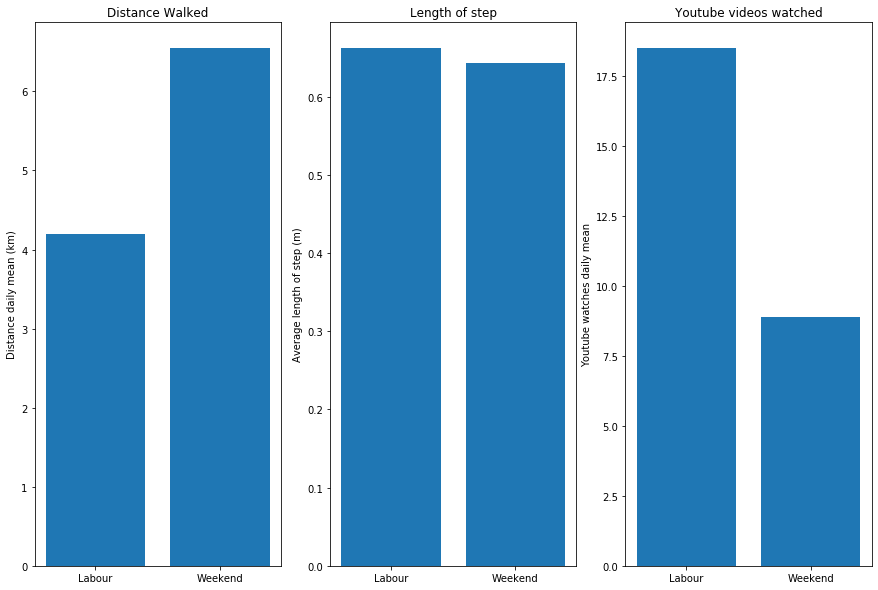

In [12]:
# let's plot the graphic

fig,ax = plt.subplots(1,3, figsize = (15,10))

ax[0].bar(['Labour', 'Weekend'], [np.mean(sample_labour['distance']), np.mean(sample_weekend['distance'])])
ax[0].set_title('Distance Walked')
ax[0].set_ylabel('Distance daily mean (km)')
ax[1].bar(['Labour', 'Weekend'], [np.mean(sample_labour['distance_per_step']), np.mean(sample_weekend['distance_per_step'])])
ax[1].set_title('Length of step')
ax[1].set_ylabel('Average length of step (m)')
ax[2].bar(['Labour', 'Weekend'], [np.mean(sample_labour['Watched']), np.mean(sample_weekend['Watched'])])
ax[2].set_title('Youtube videos watched')
ax[2].set_ylabel('Youtube watches daily mean')
plt.show()

In [13]:
# let's see the graphs divided by periods

x_plot = [first_labour, first_weekend, second_labour, second_weekend, third_labour, third_weekend]
y_plot = ['distance', 'distance_per_step', 'Watched']


print(np.mean(x_plot[2*(1%3)][y_plot[int(1/3)]]))


4.191483275961537


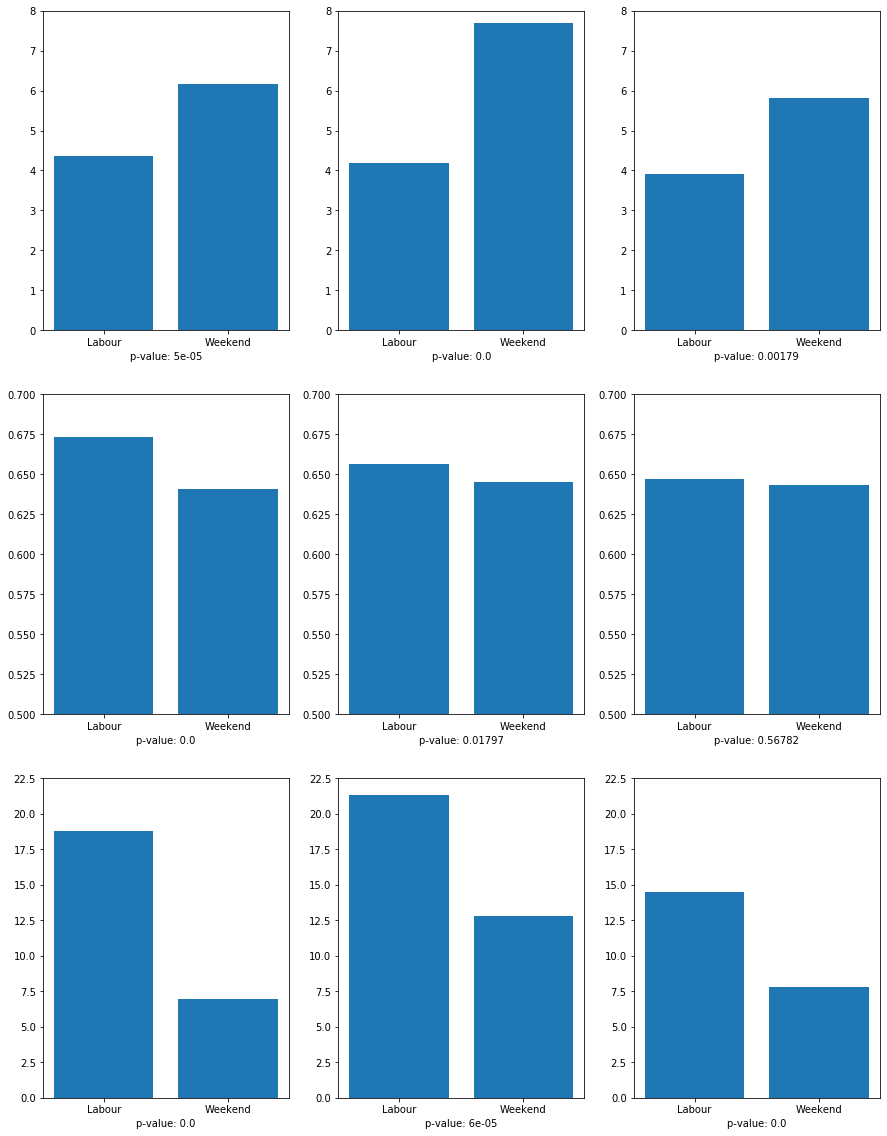

In [35]:
fig2,ax2 = plt.subplots(3,3, figsize = (15,20))

for y in range(3):
    for x in range(3):
        ax2[y,x].bar(['Labour', 'Weekend'],
                     [np.mean(x_plot[2*(x)][y_plot[y]]),
                      np.mean(x_plot[2*(x)+1][y_plot[y]])])
        result = spicy.ttest_ind(x_plot[2*x][y_plot[y]], x_plot[2*x+1][y_plot[y]], equal_var=False,  nan_policy = 'omit')
        ax2[y,x].set_xlabel('p-value: {}'.format(round(float(result.pvalue),5)))
        if y == 0:
            ax2[y,x].set_ylim(0,8)
        elif y ==1:
            ax2[y,x].set_ylim(0.5,0.7)
        else:
            ax2[y,x].set_ylim(0,22.5)
        
                

In [29]:
# let's check first the significance labour-weekend for each of the 9 pairs:

for y in range(3):
    for x in range(3):
        result = spicy.ttest_ind(x_plot[2*x][y_plot[y]], x_plot[2*x+1][y_plot[y]], equal_var=False,  nan_policy = 'omit')
        print('the pvalue for the graph ({},{}) is {}'.format(x+1,y+1,result.pvalue))

the pvalue for the graph (1,1) is 5.030558813254936e-05
the pvalue for the graph (2,1) is 2.4085680744585626e-09
the pvalue for the graph (3,1) is 0.001794135787831758
the pvalue for the graph (1,2) is 5.705275719097172e-19
the pvalue for the graph (2,2) is 0.017965384347529843
the pvalue for the graph (3,2) is 0.5678182128234719
the pvalue for the graph (1,3) is 2.5326502686645057e-19
the pvalue for the graph (2,3) is 5.755239446001967e-05
the pvalue for the graph (3,3) is 1.8896512953026287e-06


In [38]:
''' the differences in all graphs are statistically significant except the length of the steps'''

' the differences in all graphs are statistically significant except the length of the steps'

In [52]:
def get_pvalue(x,y):
    return spicy.ttest_ind(x, y, equal_var=False,  nan_policy = 'omit').pvalue
    

In [55]:
# test samples for distance walked in labour days
print(get_pvalue(first_labour['distance'],second_labour['distance']))
print(get_pvalue(second_labour['distance'],third_labour['distance']))
print(get_pvalue(third_labour['distance'],first_labour['distance']))

0.5525666113602583
0.3631195515124199
0.12672370999836421


In [56]:
# test samples for distance walked in weekend days
print(get_pvalue(first_weekend['distance'],second_weekend['distance']))
print(get_pvalue(second_weekend['distance'],third_weekend['distance']))
print(get_pvalue(third_weekend['distance'],first_weekend['distance']))

0.018034102863985265
0.011310079459051738
0.5832146522553132


In [57]:
# test samples for step distance in labour days
print(get_pvalue(first_labour['distance_per_step'],second_labour['distance_per_step']))
print(get_pvalue(second_labour['distance_per_step'],third_labour['distance_per_step']))
print(get_pvalue(third_labour['distance_per_step'],first_labour['distance_per_step']))

1.2698337563222336e-08
0.0019395148923535888
5.99435192731632e-17


In [58]:
# test samples for step distance in weekend days
print(get_pvalue(first_weekend['distance_per_step'],second_weekend['distance_per_step']))
print(get_pvalue(second_weekend['distance_per_step'],third_weekend['distance_per_step']))
print(get_pvalue(third_weekend['distance_per_step'],first_weekend['distance_per_step']))

0.40551789581255926
0.8400024007064977
0.6030644162664154


In [59]:
# test samples for videos watched in labour days
print(get_pvalue(first_labour['Watched'],second_labour['Watched']))
print(get_pvalue(second_labour['Watched'],third_labour['Watched']))
print(get_pvalue(third_labour['Watched'],first_labour['Watched']))

0.12856715517287465
3.878397299980514e-05
0.002189123149344528


In [60]:
# test samples for videos watched in weekend days
print(get_pvalue(first_weekend['Watched'],second_weekend['Watched']))
print(get_pvalue(second_weekend['Watched'],third_weekend['Watched']))
print(get_pvalue(third_weekend['Watched'],first_weekend['Watched']))

0.0010399100322731965
0.006834242880352032
0.4822602505109118
